In [1]:
import sys
import sqlalchemy
import config
import pandas as pd
import art
import psycopg2
import jupyterlab
import ipywidgets
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
import numpy as np
from dbcontext import Context
from jupyter_service import JupyterService
art.tprint(config.name, "big")
print(sys.version, config.version, jupyterlab.__version__, plotly.__version__, ipywidgets.__version__)

 _____   _____   _____  _____   _____ 
|_   _| / ____| / ____||  __ \ |_   _|
  | |  | (___  | |     | |__) |  | |  
  | |   \___ \ | |     |  _  /   | |  
 _| |_  ____) || |____ | | \ \  _| |_ 
|_____||_____/  \_____||_|  \_\|_____|
                                      
                                      

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)] 0.1.0.Alpha 4.2.5 5.24.1 8.1.5


In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
print(config.connection_string)
context = Context()
context.create(echo=False)
service = JupyterService(context)

postgresql://postgres:sa@localhost:5432/iscri


In [29]:
df = service.get_iscris_by_codes(actor1_code='USA', actor2_code='CHN')
#df["year_month"]=df.year.astype(str) + "-" + df.month.astype(str)
df["year_month"]=df.apply(lambda row: f"{row.year}-{row.month:02d}", axis=1) 
df

SELECT * FROM iscri WHERE actor1_code = 'USA' AND actor2_code = 'CHN' order by year, month


,id,year,month,actor1_code,actor2_code,risk,risk3,risk4,risk_date,iscri,iscri3,iscri4,iscri_date,year_month
0,118,2015,1,USA,CHN,0.151263,0.125013,0.026250,2024-10-19 11:16:58.826058,1.570000,0.000000,0.000000,2024-10-19 16:50:55.129374,2015-01
1,1856,2015,2,USA,CHN,0.158566,0.085820,0.072747,2024-10-19 11:16:59.149494,1.571566,0.085820,0.072747,2024-10-19 11:25:36.515152,2015-02
2,3435,2015,3,USA,CHN,0.187317,0.140317,0.047001,2024-10-19 11:16:59.494210,1.601727,0.217554,0.112473,2024-10-19 11:25:37.078040,2015-03
3,5315,2015,4,USA,CHN,0.193108,0.166323,0.026785,2024-10-19 11:16:59.858927,1.634662,0.362122,0.128010,2024-10-19 11:25:37.855729,2015-04
4,7245,2015,5,USA,CHN,0.155177,0.110513,0.044663,2024-10-19 11:17:00.187737,1.626372,0.436423,0.159872,2024-10-19 11:25:38.748435,2015-05
5,8988,2015,6,USA,CHN,0.258094,0.236619,0.021475,2024-10-19 11:17:00.505124,1.721829,0.629400,0.165360,2024-10-19 11:25:39.653804,2015-06
6,10806,2015,7,USA,CHN,0.207925,0.169231,0.038694,2024-10-19 11:17:00.829679,1.757572,0.735691,0.187519,2024-10-19 11:25:40.614227,2015-07
7,12394,2015,8,USA,CHN,0.200416,0.104671,0.095745,2024-10-19 11:17:01.111621,1.782230,0.766793,0.264511,2024-10-19 11:25:41.836034,2015-08
8,14315,2015,9,USA,CHN,0.113282,0.082297,0.030984,2024-10-19 11:17:01.420211,1.717289,0.772411,0.269045,2024-10-19 11:25:43.243021,2015-09
9,16126,2015,10,USA,CHN,0.134464,0.077630,0.056834,2024-10-19 11:17:01.740963,1.680024,0.772800,0.298974,2024-10-19 11:25:44.482845,2015-10


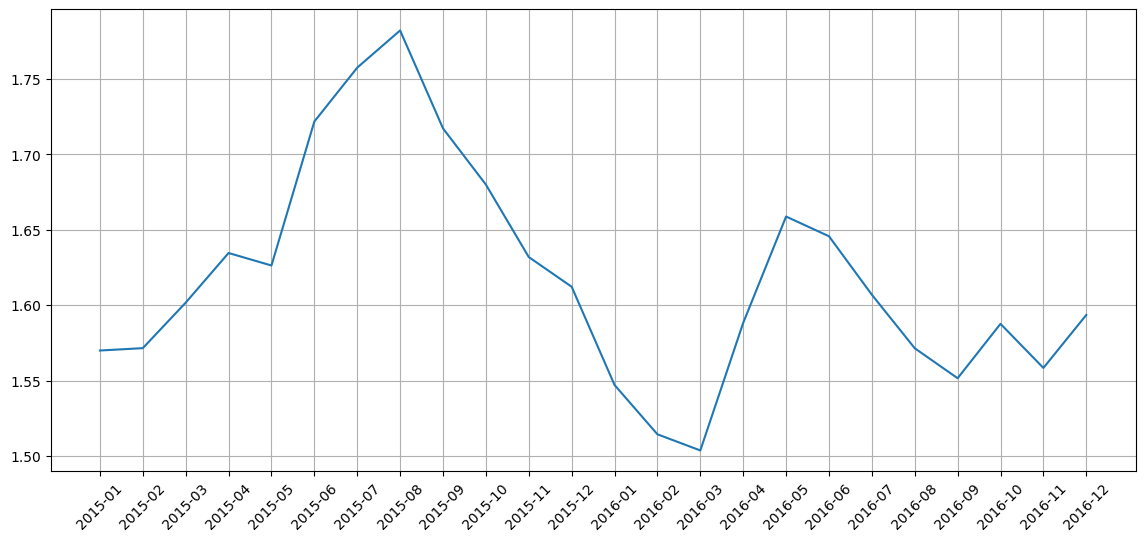

In [31]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
plt.grid()
plt.plot(df.year_month, df.iscri)
# plt.ylim(1.4,1.8)

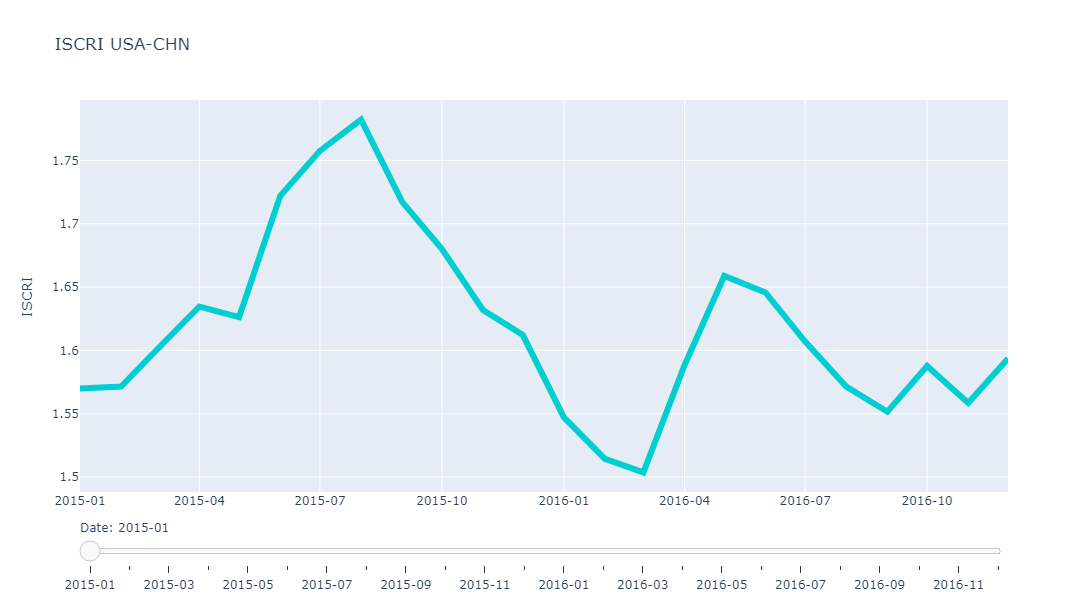

In [33]:
fig = go.Figure()

for step in np.arange(len(df)):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name=f"Month {step}",
            x=df.year_month,
            y=df.iscri[step:],
        ))

fig.data[0].visible = True

steps = []
for index, row in df.iterrows():
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              # {"title": f"Date: {row['year']}-{row['month']:02d}"},
             ],
        label=f"{row['year']}-{row['month']:02d}",
    )
    step["args"][0]["visible"][index] = True
    steps.append(step)
    
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Date: "},
    pad={"t": len(df)},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    height=600,
    title="ISCRI USA-CHN",
    # xaxis_title="Date",
    yaxis_title="ISCRI",
    # legend_title="Legend",
    xaxis=dict(tickformat="%Y-%m")
)
#fig.update_yaxes(range=[1.4, 1.8])
# fig.write_html("data/out.html")
fig.show()